# Numpy Basics

In [1]:
import numpy as np

In [2]:
arr = np.array([1,2,3,4,5])
print(arr)
print(type(arr))

[1 2 3 4 5]
<class 'numpy.ndarray'>


In [3]:
arr3d = np.array([[[1,2,3],[4,5,6]], [[7,8,9],[10,11,12]]])
print(arr3d)
print(type(arr))

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
<class 'numpy.ndarray'>


In [4]:
print(arr.ndim)

1


In [6]:
print(arr3d.ndim)

3


In [8]:
arrhd = np.array([1,2,3,4,5], ndmin=5)
print(arrhd)
print(type(arrhd))
print(arrhd.ndim)

[[[[[1 2 3 4 5]]]]]
<class 'numpy.ndarray'>
5


## DataTypes in Numpy
Numpy has some extra datatypes and refer to datatypes with one character like ```i``` for integer, ```u``` for unsigned integer etc.
Below is a list of all data types in Numpy and characters used to represent them:
1. ```i``` for integer
2. ```b``` for boolean
3. ```u``` for unsigned integer
4. ```f``` for float
5. ```c``` for complex float
6. ```m``` for time delta
7. ```M``` for datetime
8. ```O``` for object
9. ```S``` for string
10. ```U``` for unicode string
11. ```V``` for fixed chunk of memory for other type (void).

To convert datatype of existing data we can use ```astype()``` function.

In [9]:
arrs = np.array([1,2,3], dtype='S')
print(arrs)
print(arrs.dtype)

[b'1' b'2' b'3']
|S1


In [10]:
print(arr)
print(arr.dtype)

[1 2 3 4 5]
int64


In [11]:
arrch = arr.astype('f')
print(arrch)
print(arrch.dtype)

[1. 2. 3. 4. 5.]
float32


## Numpy Copy vs View
| Copy                 | View                                    |
|----------------------|-----------------------------------------|
|1. Copy is a new array|1. View is just the view of original aray|
|2. Copy does not affect the original one.|2. View affects the original one.|
|3. It owns the data. |3. It does not own the data|
|4. Ex: ```x = arr.copy()```|4. Ex: ```x = arr.view()```| 

In [12]:
x = arr.copy()
arr[0] = 42
print(arr)
print(x)

[42  2  3  4  5]
[1 2 3 4 5]


In [13]:
y = arr.view()
arr[1] = 33
print(y)
y[2] = 56
print(arr)

[42 33  3  4  5]
[42 33 56  4  5]


In [15]:
# Every Numpy array has attribute base that returns None if array owns the data, otherwise it refers to the original 
# object.
print(x.base)
print(y.base)

None
[42 33 56  4  5]


## Reshaping the array

In [17]:
# Reshaping the array
arrres = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
print(arrres.shape)
resarr = arrres.reshape(4,3)
print(resarr)

(12,)
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [18]:
resarr3d = arrres.reshape(2,3,2)
print(resarr3d)

[[[ 1  2]
  [ 3  4]
  [ 5  6]]

 [[ 7  8]
  [ 9 10]
  [11 12]]]


In [21]:
print(arrres.reshape(3,4).base)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [22]:
#To convert the Multidimensional array into 1D array you just need to give -1 in reshape function
arrres

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [23]:
newarr = resarr3d.reshape(-1)
print(newarr)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [24]:
newarr1 = resarr.flatten()
print(newarr1)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [26]:
newarr2 = resarr.ravel()
print(newarr2)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


## Iteration on Numpy arrays

In [28]:
for x in np.nditer(resarr3d):   #The function nditer() is a helping function that can be used from very basic to very advanced iterations. 
   print(x)                     #It solves some basic issues which we face in iteration.

1
2
3
4
5
6
7
8
9
10
11
12


In [30]:
for x in np.nditer(arr, flags=['buffered'], op_dtypes=['S']):
    print(x)

np.bytes_(b'42')
np.bytes_(b'33')
np.bytes_(b'56')
np.bytes_(b'4')
np.bytes_(b'5')


In [31]:
for idx, x in np.ndenumerate(arr):
    print(idx,x)

(0,) 42
(1,) 33
(2,) 56
(3,) 4
(4,) 5


In [32]:
for idx, x in np.ndenumerate(resarr3d):
    print(idx,x)

(0, 0, 0) 1
(0, 0, 1) 2
(0, 1, 0) 3
(0, 1, 1) 4
(0, 2, 0) 5
(0, 2, 1) 6
(1, 0, 0) 7
(1, 0, 1) 8
(1, 1, 0) 9
(1, 1, 1) 10
(1, 2, 0) 11
(1, 2, 1) 12


## Joining Numpy Arrays

In [38]:
arr1 = np.array([[1,2],[3,7]])
arr2 = np.array([[4,5],[6,8]])
arr3 = np.concatenate((arr1, arr2))
print(arr3)

[[1 2]
 [3 7]
 [4 5]
 [6 8]]


In [39]:

arr4 = np.concatenate((arr1, arr2), axis=1)
print(arr4)

[[1 2 4 5]
 [3 7 6 8]]


In [43]:
arr5 = np.array([1,2,3])
arr6 = np.array([4,5,6])
arr7 = np.stack((arr5, arr6), axis=1)
print(arr7)

[[1 4]
 [2 5]
 [3 6]]


In [45]:
arr8 = np.hstack((arr5, arr6))
print(arr8)

[1 2 3 4 5 6]


In [46]:
arr9 = np.vstack((arr5, arr6))
print(arr9)

[[1 2 3]
 [4 5 6]]


In [47]:
arr10 = np.dstack((arr5, arr6))
print(arr10)

[[[1 4]
  [2 5]
  [3 6]]]


## Splitting Numpy arrays

In [48]:
arr11 = np.array_split(arr8,3)
print(arr11)

[array([1, 2]), array([3, 4]), array([5, 6])]


In [49]:
print(arr11[0])

[1 2]


In [50]:
arr12 = np.array_split(arr9,3,axis=1)
print(arr12)

[array([[1],
       [4]]), array([[2],
       [5]]), array([[3],
       [6]])]


In [51]:
arr13 = np.hsplit(arr9,3)

In [52]:
arr13

[array([[1],
        [4]]),
 array([[2],
        [5]]),
 array([[3],
        [6]])]

## Search in Numpy arrays

In [53]:
x = np.where(arr == 5)
print(x)

(array([4]),)


In [54]:
y = np.where(arr%2==0)
print(y)

(array([0, 2, 3]),)


In [55]:
z = np.where(arr%2!=0)
print(z)

(array([1, 4]),)


In [57]:
arrsort = np.array([6,7,8,9])
a = np.searchsorted(arrsort,8) # It uses binary search in backend to search the element
print(a)

2


## Numpy Sorting

In [58]:
print(np.sort(arr))

[ 4  5 33 42 56]


In [59]:
arr = np.array(['banana','apple','cherry'])
print(np.sort(arr))

['apple' 'banana' 'cherry']


In [60]:
arr = np.array([True, False, True])
print(np.sort(arr))

[False  True  True]


In [61]:
print(np.sort(arr10))

[[[1 4]
  [2 5]
  [3 6]]]


## Filtering Numpy arrays
Filtering to get some elements from existing array to new array

In [62]:
arr = np.array([41,42,43,44])
x = [True, False, True, False]
newarr = arr[x]
print(newarr)

[41 43]


In [64]:
filter_arr = []
for x in arr:
    if x>42:
        filter_arr.append(True)
    else:
        filter_arr.append(False)
newarr = arr[filter_arr]
print(filter_arr)
print(newarr)

[False, False, True, True]
[43 44]


# Numpy Random

All computer programs are a set of definite instructions so generating a random number has some kind of algorithm behind it.  
The generation of random number has ***pseudo random*** algorithm as its base algorithm.

In [65]:
from numpy import random

In [66]:
x = random.randint(100)
print(x)

24


In [67]:
y = random.rand(20)
print(y)

[0.06741539 0.01777894 0.45084839 0.57718914 0.30062528 0.97073073
 0.83947717 0.73229892 0.65475371 0.02585344 0.2763851  0.09467318
 0.58485912 0.88517937 0.07687011 0.86395365 0.11219687 0.7814942
 0.51693454 0.89010487]


In [68]:
z = random.randint(100, size=5)
print(z)

[58 72 48 15 37]


In [69]:
w = random.randint(100, size=(2,4))

In [70]:
w

array([[29, 51, 54, 80],
       [10, 42, 83, 45]], dtype=int32)

In [72]:
s = random.randint(100, size=(2,3,3))
print(s)

[[[96 63 45]
  [72 55 54]
  [11 98  6]]

 [[42 14 33]
  [11 61 44]
  [54 43  1]]]


In [73]:
t = random.choice([4,6,3,7])
print(t)

4


In [74]:
u = random.choice([4,6,3,7], size=(3,5))

In [75]:
u

array([[3, 6, 7, 6, 7],
       [6, 6, 7, 7, 6],
       [4, 7, 6, 4, 7]])

## Data Distribution

In [76]:
x = random.choice([3,5,7,9],p=[0.1,0.3,0.6,0.0],size=(100))
print(x)

[3 5 7 5 7 7 7 7 7 7 7 7 7 5 5 5 7 5 7 7 7 7 3 5 7 5 7 7 5 5 7 7 7 7 7 7 7
 5 3 7 7 7 7 7 7 5 7 7 7 5 3 5 7 7 7 3 3 5 5 5 5 7 5 7 7 5 3 3 7 5 3 7 3 7
 7 7 7 7 5 7 5 3 5 7 7 7 5 7 7 7 7 7 5 5 7 3 5 7 5 7]


In [82]:
arr = np.array([1,2,3,4,5])
random.shuffle(arr) #It make changes in original array
print(arr)

[1 5 2 3 4]


In [83]:
np.sort(arr)

array([1, 2, 3, 4, 5])

In [84]:
arr

array([1, 5, 2, 3, 4])

In [85]:
arr = np.sort(arr)

In [86]:
print(random.permutation(arr)) #It doesn't make changes in original array

[2 1 4 5 3]


# Seaborn

In [87]:
!pip install seaborn



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: D:\Programming\python.exe -m pip install --upgrade pip


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

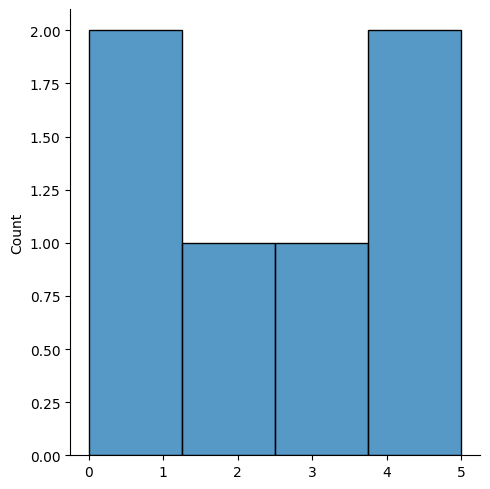

In [90]:
sns.displot([0,1,2,3,4,5])
plt.show()

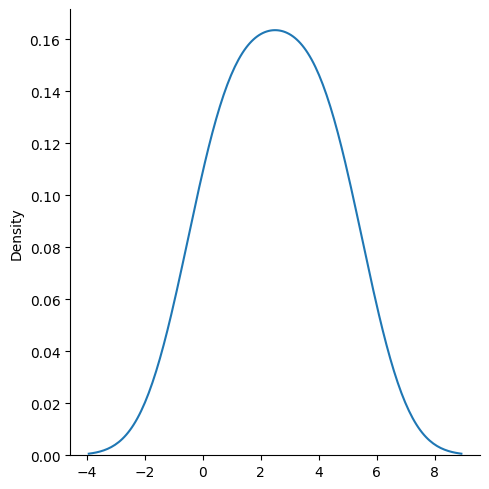

In [91]:
sns.displot([0,1,2,3,4,5], kind='kde')
plt.show()

## Normal Distribution  
It is a *Continuous Distribution*.
It has three parameters:  
```loc``` -> (Mean) where the peak of the bell exists.  
```scale``` -> (Standard Deviation) how flat the graph distribution should be.  
```size``` -> The shape of the returned array.

In [92]:
x = random.normal(size=(2,3))
print(x)

[[-1.10983346  0.39188076  1.44563115]
 [ 0.43168198 -0.61798091  0.61069383]]


In [93]:
x = random.normal(loc=1, scale=2, size=(2,3))
print(x)

[[ 2.32251909 -1.37437046  2.75485973]
 [ 1.42736281  4.01830019  2.24778658]]


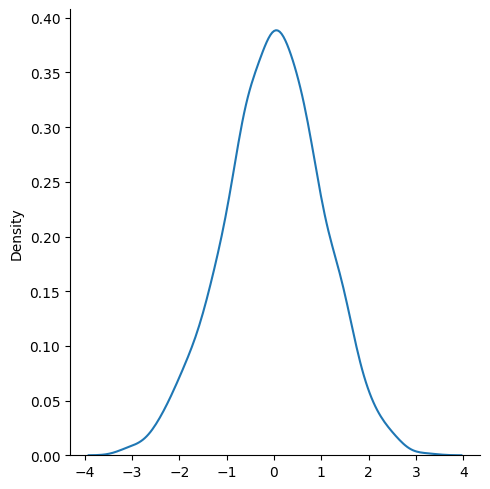

In [95]:
sns.displot(random.normal(size=(1000)), kind='kde')
plt.show() #This curve is known as Bell Curve

## Binomial Distribution  
It is a *Descrete Distribution*.
It describes the outcome of the binary scenarios,  
It has three parameters:  
```n``` : number of trails.  
```p``` : probablity of occurence of each trial.  
```size``` : The shape of the returned array.  

In [96]:
x = random.binomial(n=10, p=.5, size=10)
print(x)

[7 7 6 5 5 4 6 6 3 5]


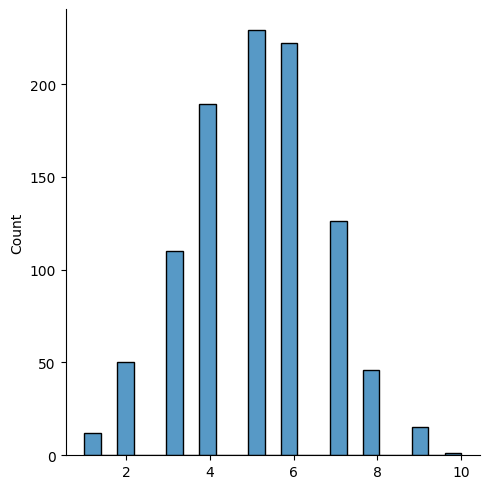

In [100]:
sns.displot(random.binomial(n=10, p=.5, size=1000))
plt.show()

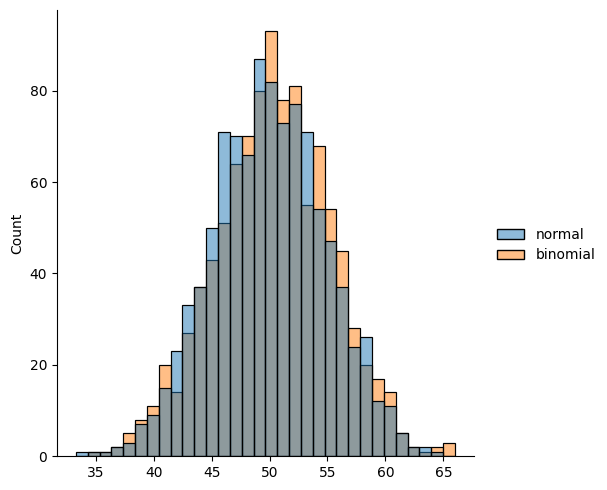

In [103]:
data = {
    "normal": random.normal(loc = 50, scale = 5, size = 1000),
    "binomial": random.binomial(n=100, p=.5, size = 1000)
}
sns.displot(data)
plt.show()

## Poisson Distribution
Poisson Distribution is a *Discrete Distribution*.  
It estimates how many times an event happen in a specific time.

It has two parameters:  
```lam```: Rate or known number of occurence.  
```size```: The shape of returned array.

In [104]:
x = random.poisson(lam=2, size=10)

In [105]:
x

array([0, 1, 2, 0, 1, 1, 3, 1, 0, 1], dtype=int32)

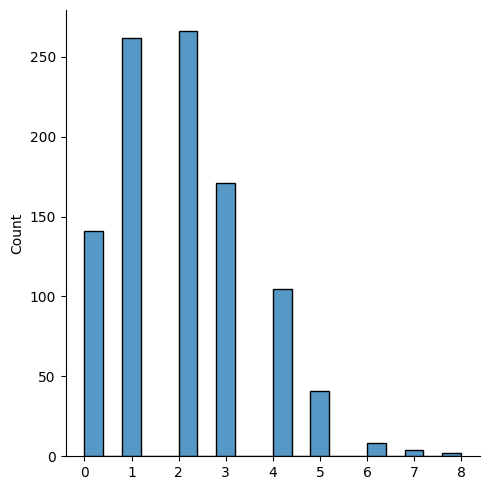

In [106]:
sns.displot(random.poisson(lam=2, size=1000))
plt.show()

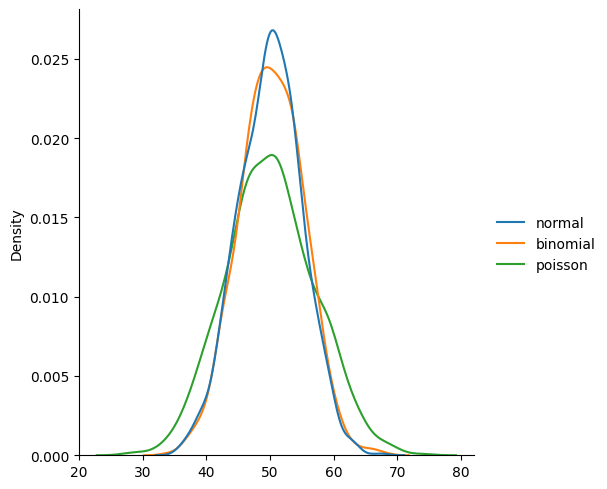

In [109]:
data = {
    "normal": random.normal(loc = 50, scale = 5, size=1000),
    "binomial": random.binomial(n = 100, p = .5, size=1000),
    "poisson" : random.poisson(lam=50, size=1000)
}
sns.displot(data, kind='kde')
plt.show()

## Uniform Distribution
Used to descrete probablity where every event have equal chances of occuring.  
It has three parameters:  
```low```: Lower bound - default 0.0.  
```high```: Upper bound - default 1.0.  
```size```: The shape of returned array.

In [110]:
x = random.uniform(size=(2,3))
print(x)

[[0.99592569 0.28822744 0.63366265]
 [0.7505304  0.54563001 0.69869126]]


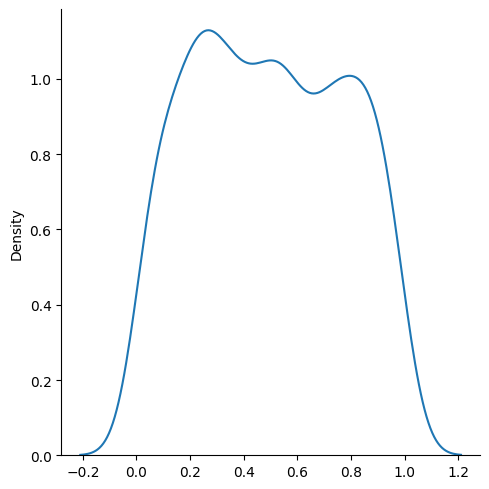

In [111]:
sns.displot(random.uniform(size = 1000), kind='kde')
plt.show()

## Logistic Distribution
It is used to describe growth.  
It is extensively used in machine learning, logistic regression and neural networks.  
It has three parameters:  
```loc``` : mean, where the peak is, Default = 0.  
```scale``` : standard deviation, the flatness of distribution, Default = 1.  
```size```: shape of returned array.  

In [112]:
x = random.logistic(loc = 1, scale = 2, size=(2,3))
print(x)

[[-1.94474978  1.12246599 -4.02035339]
 [-2.47949082  2.18762138 -6.3843847 ]]


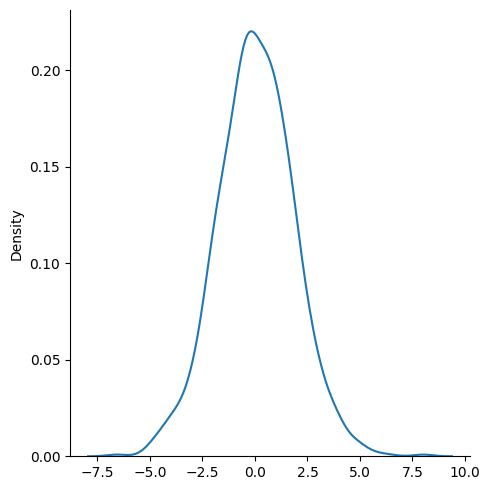

In [113]:
sns.displot(random.logistic(size=1000),kind='kde')
plt.show()

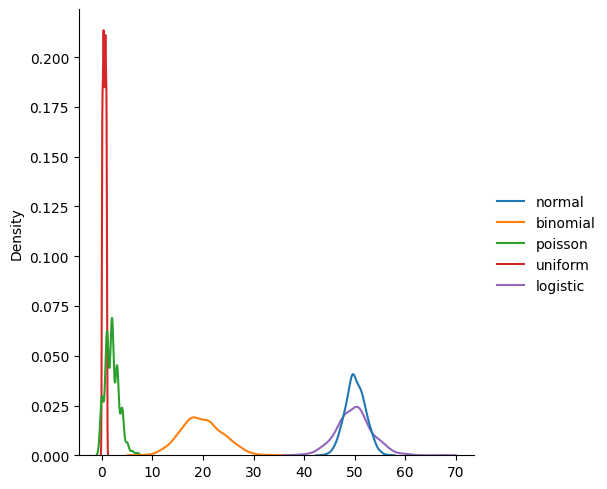

In [114]:
data = {
    "normal" : random.normal(loc = 50,scale=2, size=1000),
    "binomial": random.binomial(n=100, p=.2,size=1000),
    "poisson": random.poisson(lam = 2, size=1000),
    "uniform": random.uniform(size=1000),
    "logistic": random.logistic(loc=50,scale=2,size=1000)
}
sns.displot(data, kind='kde')
plt.show()

## Multinomial Distribution
Multinomial Distribution is a generalization of Binomial Distribution.  
It describes the outcomes of multi-nomial situations.  
It has three parameters:  
```n```: Number of times to run the experiment.   
```pvals```: List of probablities of outcomes.  
```size```: Shape of returned array.

In [116]:
#For dice
x = random.multinomial(n=6, pvals=[1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
print(x)

[0 1 1 1 2 1]


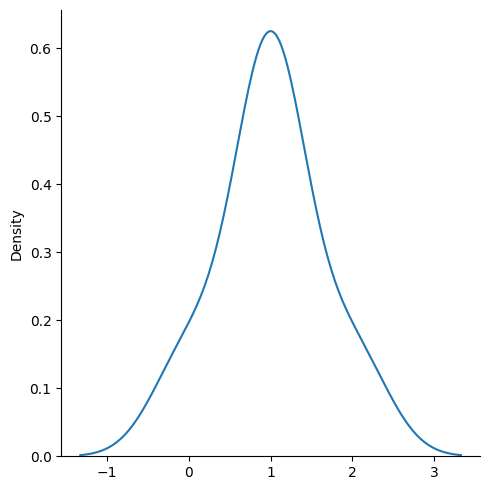

In [118]:
sns.displot(x ,kind='kde')
plt.show()

## Exponential Distribution
Exponential Distribution is used for describing time till next event.  
It has two parameters:  
```scale```: inverse of rate (similar to lam in poisson distribution) defaults to 1.0.  
```size```: shape of returned array.

In [119]:
x = random.exponential(scale=2,size=(2,3))
print(x)

[[0.01908099 0.17156943 0.72098405]
 [0.5363273  0.71829196 0.83663846]]


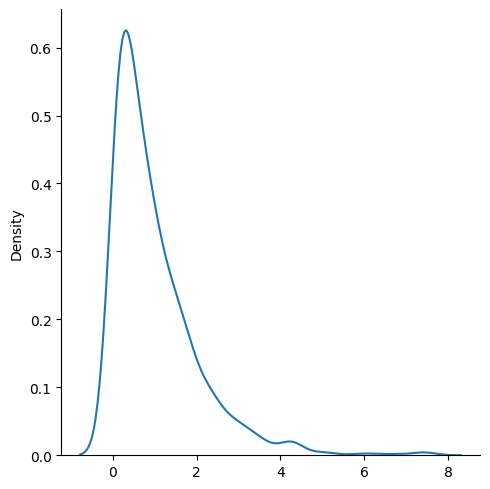

In [120]:
sns.displot(random.exponential(size=1000),kind='kde')
plt.show()

## Chi square distribution
It basically used to verify the hypothesis.  
It has basically two parameters:  
```df```: Degree of freedom.  
```size```: Shape of returned array.

In [121]:
x = random.chisquare(df=2,size=(2,3))
print(x)

[[1.34761698 0.11092612 2.15906773]
 [0.92227488 3.75444617 3.99993845]]


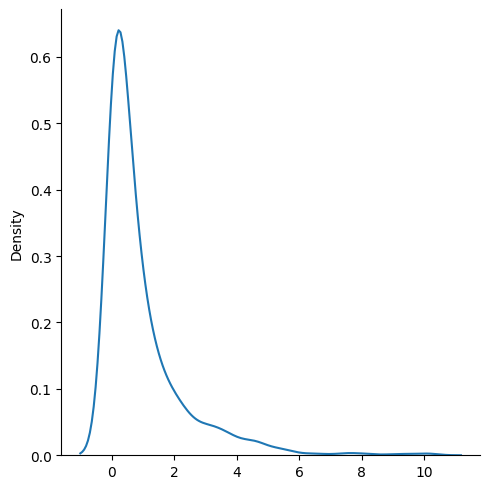

In [125]:
sns.displot(random.chisquare(df=1,size=1000),kind='kde')
plt.show()

## Rayleigh Distribution
It is used for signal processing.  
It has two parameters:  
```scale```: Decides how flat the distribution will be. Default 1.0.  
```size```: The shape of returned array.

In [126]:
x = random.rayleigh(scale = 2,size=(2,3))
print(x)

[[2.079978   3.46103817 1.86595504]
 [3.17830067 3.55907299 1.219934  ]]


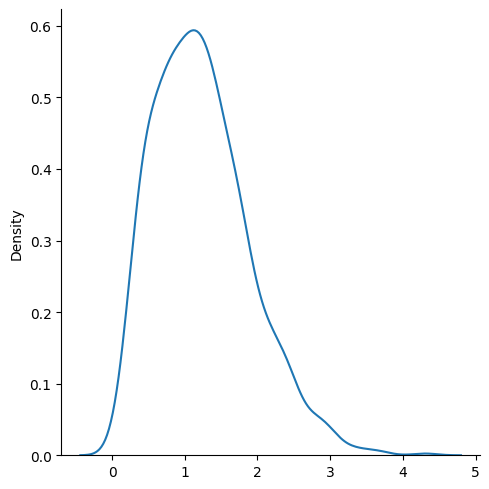

In [127]:
sns.displot(random.rayleigh(size=1000), kind='kde')
plt.show()

## Pareto Distribution
This distribution follows Pareto's Law i.e. 80-20 distribution (20% factor cause 80% outcome).  
It has two parameters:  
```a```: Shape parameter.  
```size```: The shape of returned array.

In [128]:
x = random.pareto(a=2,size=(2,3))
print(x)

[[0.01467057 0.16455264 1.28168326]
 [4.63264056 0.19953469 1.75059348]]


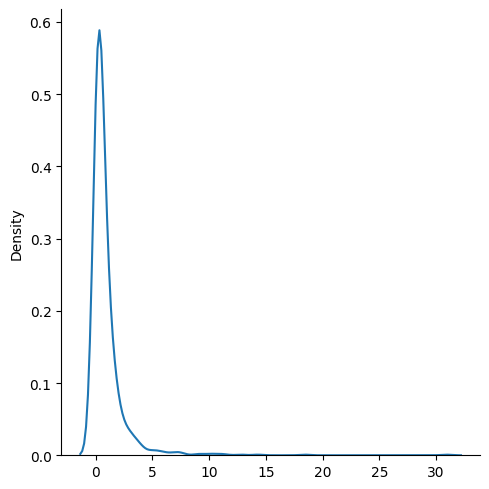

In [129]:
sns.displot(random.pareto(a=2,size=1000),kind='kde')
plt.show()

## Zipf Distribution
This distribution is based on Zipf's Law:  
In a collection, the nth common term is 1/n times of the most common term. E.g. the 5th most common word in English occurs nearly 1/5 times as often as the most common word.  

It has two parameters:  
```a```: Distribution parameter.  
```size```: The shape of returned array.

In [130]:
x = random.zipf(a = 2,size=(2,3))
print(x)

[[24  1  4]
 [ 2  3  4]]


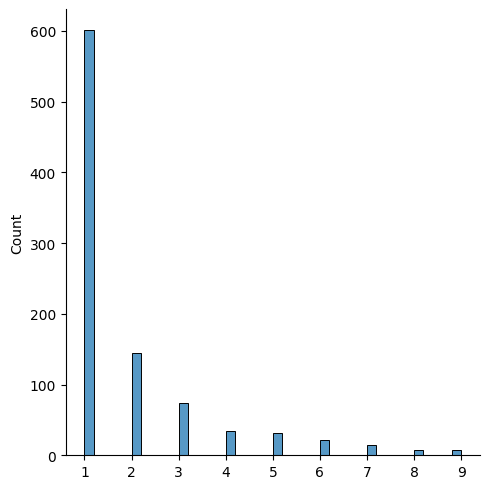

In [133]:
x = random.zipf(a = 2,size=1000)
sns.displot(x[x<10])
plt.show()

# Numpy ufuncs

In [134]:
#